In [4]:
# 3D DSW
import numpy as np
from Hamiltonian import Hamiltonian
from Visualization import Visualize

def quartic_double_well_3d(x, y, z, a, b, V_max, L=None):
    """
    3D quartic double well potential.
    """
    # r = np.sqrt(x**2 + y**2)  # radial distance from z-axis
    V_x = (V_max / b**4) * (((x - (a/2))**2) - b**2)**2
    V_y = (V_max / b**4) * (((y - (a/2))**2) - b**2)**2
    V = V_x + V_y
    return V

# Parameters
N = 40  # Reduced for 3D (64^3 = 250k points)
L = 10.0  # Bohr
num_states = 5

V_max = 10.0
b = 1.0
a = L  

# Create Hamiltonian
H = Hamiltonian(
    N=N,
    L=L,
    potential_func=lambda x, y, z, L: quartic_double_well_3d(x, y, z, a=a, b=b, V_max=V_max, L=L),
    ndim=3,
    num_states=num_states,
    bc='dirichlet'
)

/Users/kosta/Documents/Coding/nyu/compphys/tp-cp-collab/TP_version/Visualization.py:89: SyntaxWarning: invalid escape sequence '\p'
  ax1.plot(grid, psi, label="Wavefunction $\psi$")
/Users/kosta/Documents/Coding/nyu/compphys/tp-cp-collab/TP_version/Visualization.py:90: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_title("Wavefunction ($\psi$)")
/Users/kosta/Documents/Coding/nyu/compphys/tp-cp-collab/TP_version/Visualization.py:92: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel("$\psi(x)$")
/Users/kosta/Documents/Coding/nyu/compphys/tp-cp-collab/TP_version/Visualization.py:98: SyntaxWarning: invalid escape sequence '\p'
  label="Probability Density $|\psi|^2$",
/Users/kosta/Documents/Coding/nyu/compphys/tp-cp-collab/TP_version/Visualization.py:102: SyntaxWarning: invalid escape sequence '\p'
  ax2.set_title("Probability Density ($|\psi|^2$)")
/Users/kosta/Documents/Coding/nyu/compphys/tp-cp-collab/TP_version/Visualization.py:104: SyntaxWarning: invalid escape sequ

In [5]:

# Solve for eigenvalues and eigenvectors
evals, evecs = H.solve()
print("Eigenvalues (Hartree):", evals)

Eigenvalues (Hartree): [7.99943114 8.11899412 8.11899412 8.13305673 8.23855709]


--- Generating plots for 3D_double_well ---


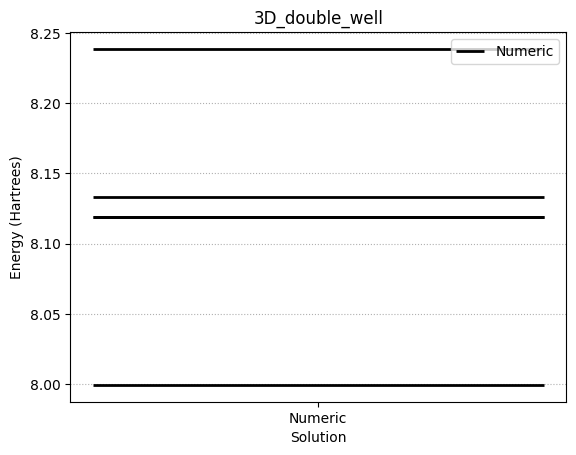

Plotting 3D State 0 as 2D slice at z=0.13


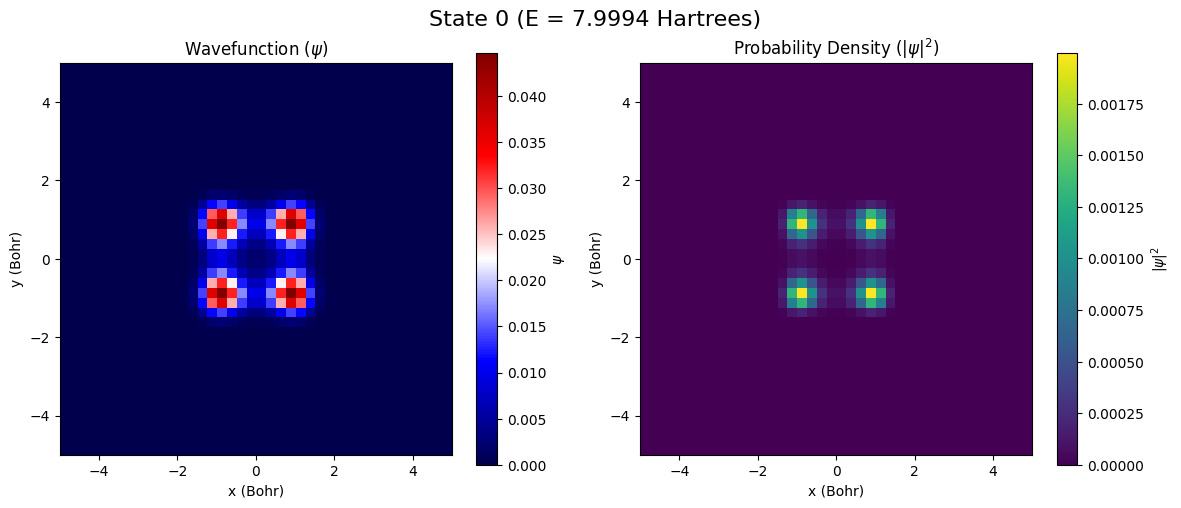

Plotting 3D State 1 as 2D slice at z=0.13


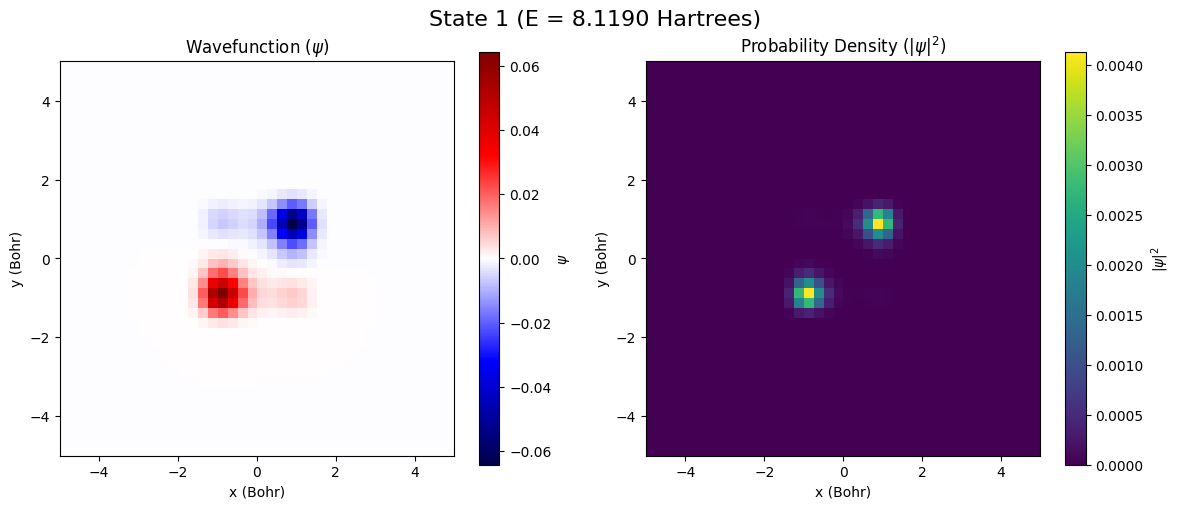

Plotting 3D State 2 as 2D slice at z=0.13


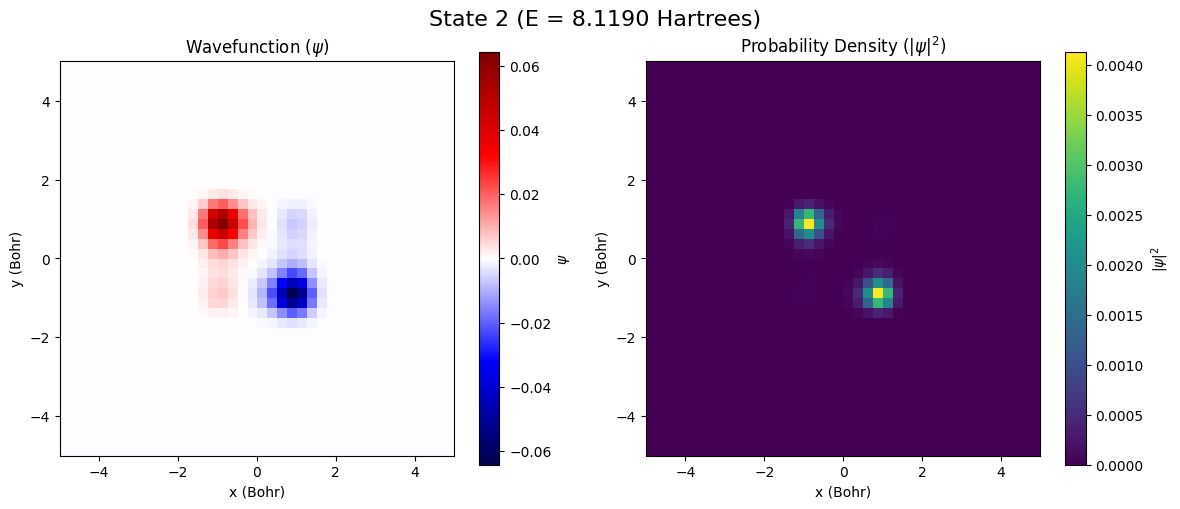

Plotting 3D State 3 as 2D slice at z=0.13


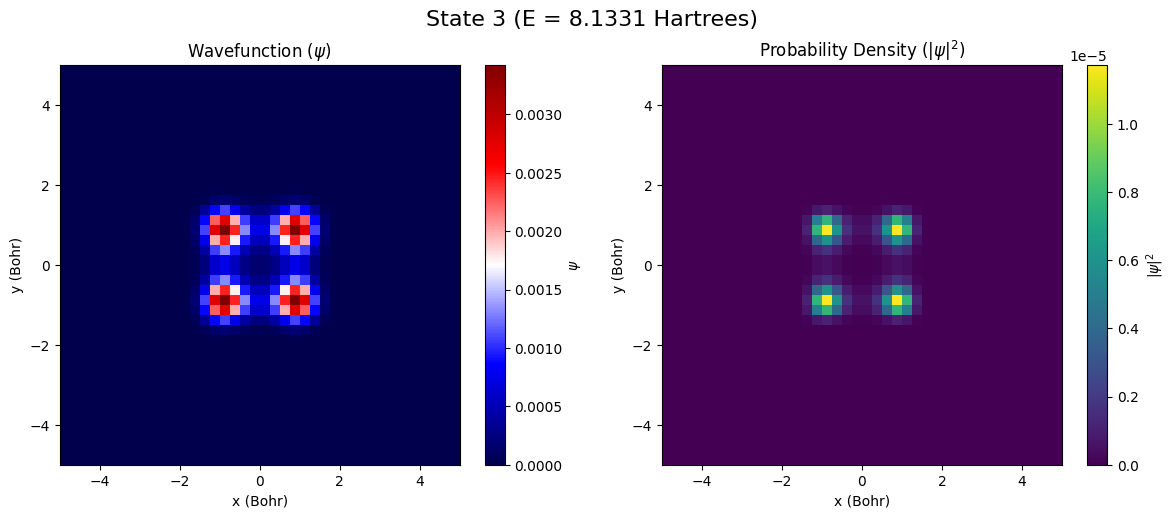

Plotting 3D State 4 as 2D slice at z=0.13


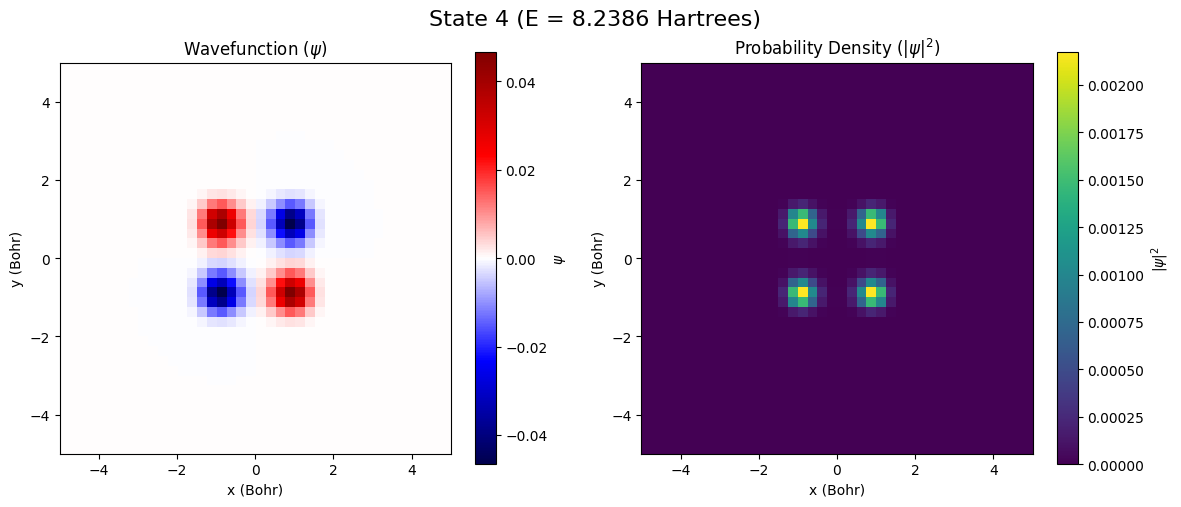

In [6]:
# Visualization
H.test_case_name = "3D_double_well"
vis = Visualize(H, states_to_plot=5)
vis.plot_all()

## 3D Visualizations

The Visualization class now supports rich 3D visualizations with animations!


## Time Evolution Setup

Now we'll set up time evolution using eigenstate expansion.


In [7]:
from time_evolution import time_evolve_sequence, calculate_oscillation_period, create_superposition

# Create initial state as superposition of ground and first excited state
# This ensures visible time evolution (single eigenstates don't change in probability density)
initial_state = create_superposition(eigenstates=evecs, states_to_mix=[0, 1])

# Verify it's a superposition
coefficients = np.dot(evecs.T, initial_state)
print("Expansion coefficients (first 5):", np.abs(coefficients[:5])**2)
print("Sum of |c_n|^2:", np.sum(np.abs(coefficients)**2))
print(f"\nInitial state is {np.sum(np.abs(coefficients[:2])**2)*100:.1f}% ground + first excited")


Expansion coefficients (first 5): [5.00000000e-01 5.00000000e-01 2.31292171e-29 7.20662041e-28
 8.09651648e-30]
Sum of |c_n|^2: 1.0000000000004925

Initial state is 100.0% ground + first excited


In [8]:
# Calculate appropriate time scale based on energy difference
period = calculate_oscillation_period(evals, state1_idx=0, state2_idx=1)
t_max = 2 * period  # Evolve for 2 full periods
num_time_steps = 100
times = np.linspace(0, t_max, num_time_steps)

print(f"Energy difference: {evals[1] - evals[0]:.6f} Hartrees")
print(f"Oscillation period: {period:.4f} a.u.")
print(f"Time range: 0 to {t_max:.4f} a.u. ({num_time_steps} steps)")

# Time evolve the state
print("\nEvolving state in time...")
evolved_states_flat = time_evolve_sequence(initial_state, evecs, evals, times)

# Reshape to (n_steps, N, N, N) for visualization
psi_trajectory = np.array([psi.reshape(N, N, N) for psi in evolved_states_flat])
print(f"Trajectory shape: {psi_trajectory.shape}")


Energy difference: 0.119563 Hartrees
Oscillation period: 52.5513 a.u.
Time range: 0 to 105.1025 a.u. (100 steps)

Evolving state in time...
Trajectory shape: (100, 40, 40, 40)


## Time Evolution Animation

Animate the time evolution of the wavefunction.


In [1]:
# Animate time evolution through z-slices
# Set fps=60 for high frame rate, or fps=30 for standard
# Set save_path='time_evolution.mp4' to save the animation
anim = vis.animate_time_evolution_3d(
    psi_trajectory, 
    times=times, 
    slice_axis='z', 
    fps=30,  # Adjust for smoothness
    save_path="time_evolution.mp4"  # Set to 'time_evolution.mp4' to save
)


NameError: name 'vis' is not defined

In [2]:
# Visualize ground state with potential overlay
vis.visualize_potential_with_wavefunction_interactive(
    state_idx=0,  # Ground state
    z_slice_idx=None,  # Uses middle slice by default
    show_potential_surface=True,
    show_prob_isosurface=True,
    potential_opacity=0.6,
    prob_opacity=0.4
)

NameError: name 'vis' is not defined

In [3]:
# Animated time evolution with potential overlay
import plotly.graph_objects as go

z_slice_idx = N // 2
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y, indexing='ij')

# Calculate potential once
V_x = (V_max / b**4) * (((X - (a/2))**2) - b**2)**2
V_y = (V_max / b**4) * (((Y - (a/2))**2) - b**2)**2
V_surface = V_x + V_y

# Create frames for animation
frames = []
for i, t in enumerate(times):
    prob_at_time = np.abs(psi_trajectory[i])**2
    prob_slice = prob_at_time[:, :, z_slice_idx]
    
    frames.append(go.Frame(
        data=[go.Surface(
            x=X,
            y=Y,
            z=V_surface,
            surfacecolor=prob_slice,
            colorscale='Viridis',
            colorbar=dict(title="|ψ|²")
        )],
        name=f"frame_{i}"
    ))

# Initial frame
prob_0 = np.abs(psi_trajectory[0])**2
prob_slice_0 = prob_0[:, :, z_slice_idx]

fig = go.Figure(
    data=[go.Surface(
        x=X,
        y=Y,
        z=V_surface,
        surfacecolor=prob_slice_0,
        colorscale='Viridis',
        colorbar=dict(title="|ψ|²")
    )],
    frames=frames
)

fig.update_layout(
    title="Time Evolution: Potential Surface with Probability Density",
    scene=dict(
        xaxis_title="x (Bohr)",
        yaxis_title="y (Bohr)",
        zaxis_title="Potential V(x,y) (Hartree)",
        aspectmode="data",
        camera=dict(eye=dict(x=1.8, y=1.8, z=1.2))
    ),
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 50, 'redraw': True},
                'fromcurrent': True
            }]
        }, {
            'label': 'Pause',
            'method': 'animate',
            'args': [[None], {
                'frame': {'duration': 0, 'redraw': False},
                'mode': 'immediate'
            }]
        }]
    }],
    sliders=[{
        'active': 0,
        'steps': [{
            'args': [[f'frame_{i}'], {
                'frame': {'duration': 0, 'redraw': True},
                'mode': 'immediate'
            }],
            'label': f't = {t:.4f}',
            'method': 'animate'
        } for i, t in enumerate(times)]
    }],
    width=1000,
    height=800
)

fig.show()

NameError: name 'N' is not defined